In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as p

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 3)
EPOCHS = 100

In [10]:
from keras.preprocessing.image import ImageDataGenerator

root_path = "data_images/"
#podstawowa ścieżka

gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)
#przeskalowanie i podział na zbiór walidacyjny i testowy

# Load Data
train_dataset = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes=["smile","non_smile"],
    shuffle=True,
    batch_size=32,
    target_size=(64,64),
    subset="training"
)
#shuffle=true za każdym razem wczytuje w innej kolejności

validation_dataset = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes=["smile","non_smile"],
    shuffle=True,
    batch_size=32,
    target_size=(64,64),
    subset="validation"
)

Found 963 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [ ]:
#przygotuj siec konwolucyjna i wyświetl wykresy

In [24]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 31, 31, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 8)         1160      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 1568)              0         
                                                                 
 dense_19 (Dense)            (None, 1024)             

In [25]:
history = model.fit(train_dataset, epochs = EPOCHS, validation_data=(validation_dataset), callbacks = [es])

Epoch 1/100
31/31 [==============================] - 2s 43ms/step - loss: 0.6051 - accuracy: 0.6822 - val_loss: 0.4718 - val_accuracy: 0.8083
Epoch 2/100
31/31 [==============================] - 2s 49ms/step - loss: 0.2738 - accuracy: 0.8972 - val_loss: 0.1804 - val_accuracy: 0.9542
Epoch 3/100
31/31 [==============================] - 1s 42ms/step - loss: 0.1955 - accuracy: 0.9273 - val_loss: 0.2400 - val_accuracy: 0.9375
Epoch 4/100
31/31 [==============================] - 1s 34ms/step - loss: 0.1730 - accuracy: 0.9429 - val_loss: 0.1628 - val_accuracy: 0.9417
Epoch 5/100
31/31 [==============================] - 1s 35ms/step - loss: 0.1186 - accuracy: 0.9564 - val_loss: 0.1391 - val_accuracy: 0.9458
Epoch 6/100
31/31 [==============================] - 1s 35ms/step - loss: 0.1052 - accuracy: 0.9647 - val_loss: 0.1710 - val_accuracy: 0.9292
Epoch 7/100
31/31 [==============================] - 1s 34ms/step - loss: 0.0990 - accuracy: 0.9709 - val_loss: 0.1909 - val_accuracy: 0.9333
Epoch 

In [26]:
img, label = validation_dataset.next()
y_pred = model.predict(img)

1/1 [==============================] - 0s 90ms/step


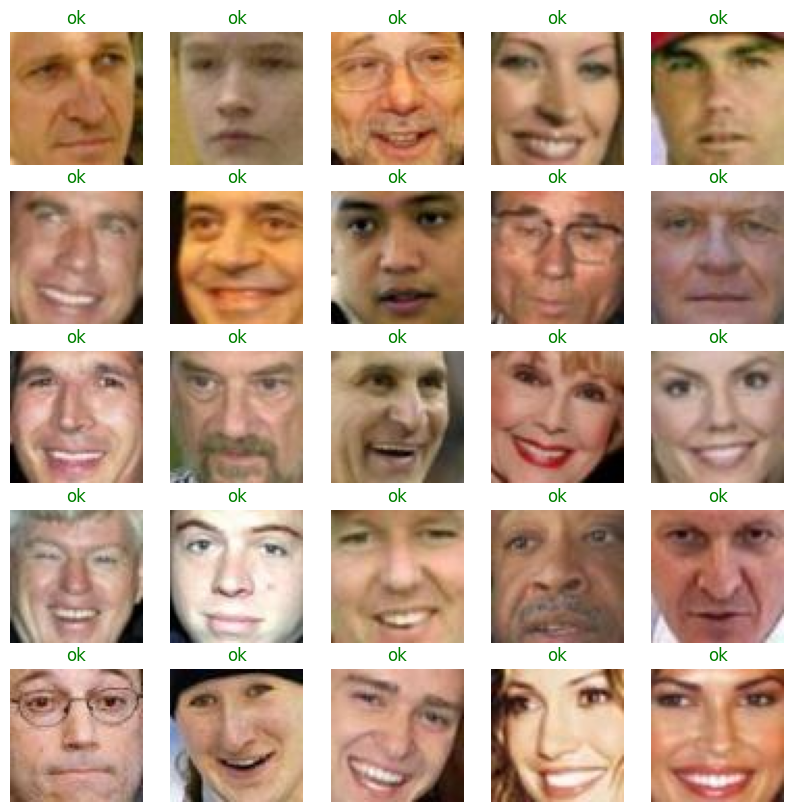

In [27]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(img[i])
    plt.axis('off')
    if np.round(y_pred[i])[0] == label[i][0]:
        plt.title("ok", color = 'green')
    else:
        plt.title("nie ok", color = 'red')    

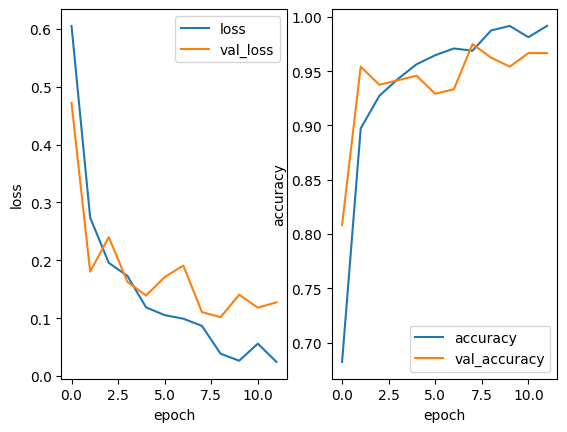

In [28]:
hist = pd.DataFrame(history.history)
hist

plt.subplot(1,2,1)
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist.accuracy, label = "accuracy")
plt.plot(hist.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()